In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df=pd.read_csv('C:/Users/Admin/Desktop/40 projects/bank-additional-full.csv',delimiter=';')
df.head(3)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.tail(3)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
#pip install missingno
import missingno as msno #------ finds the missing value and helps in ploting

<AxesSubplot:>

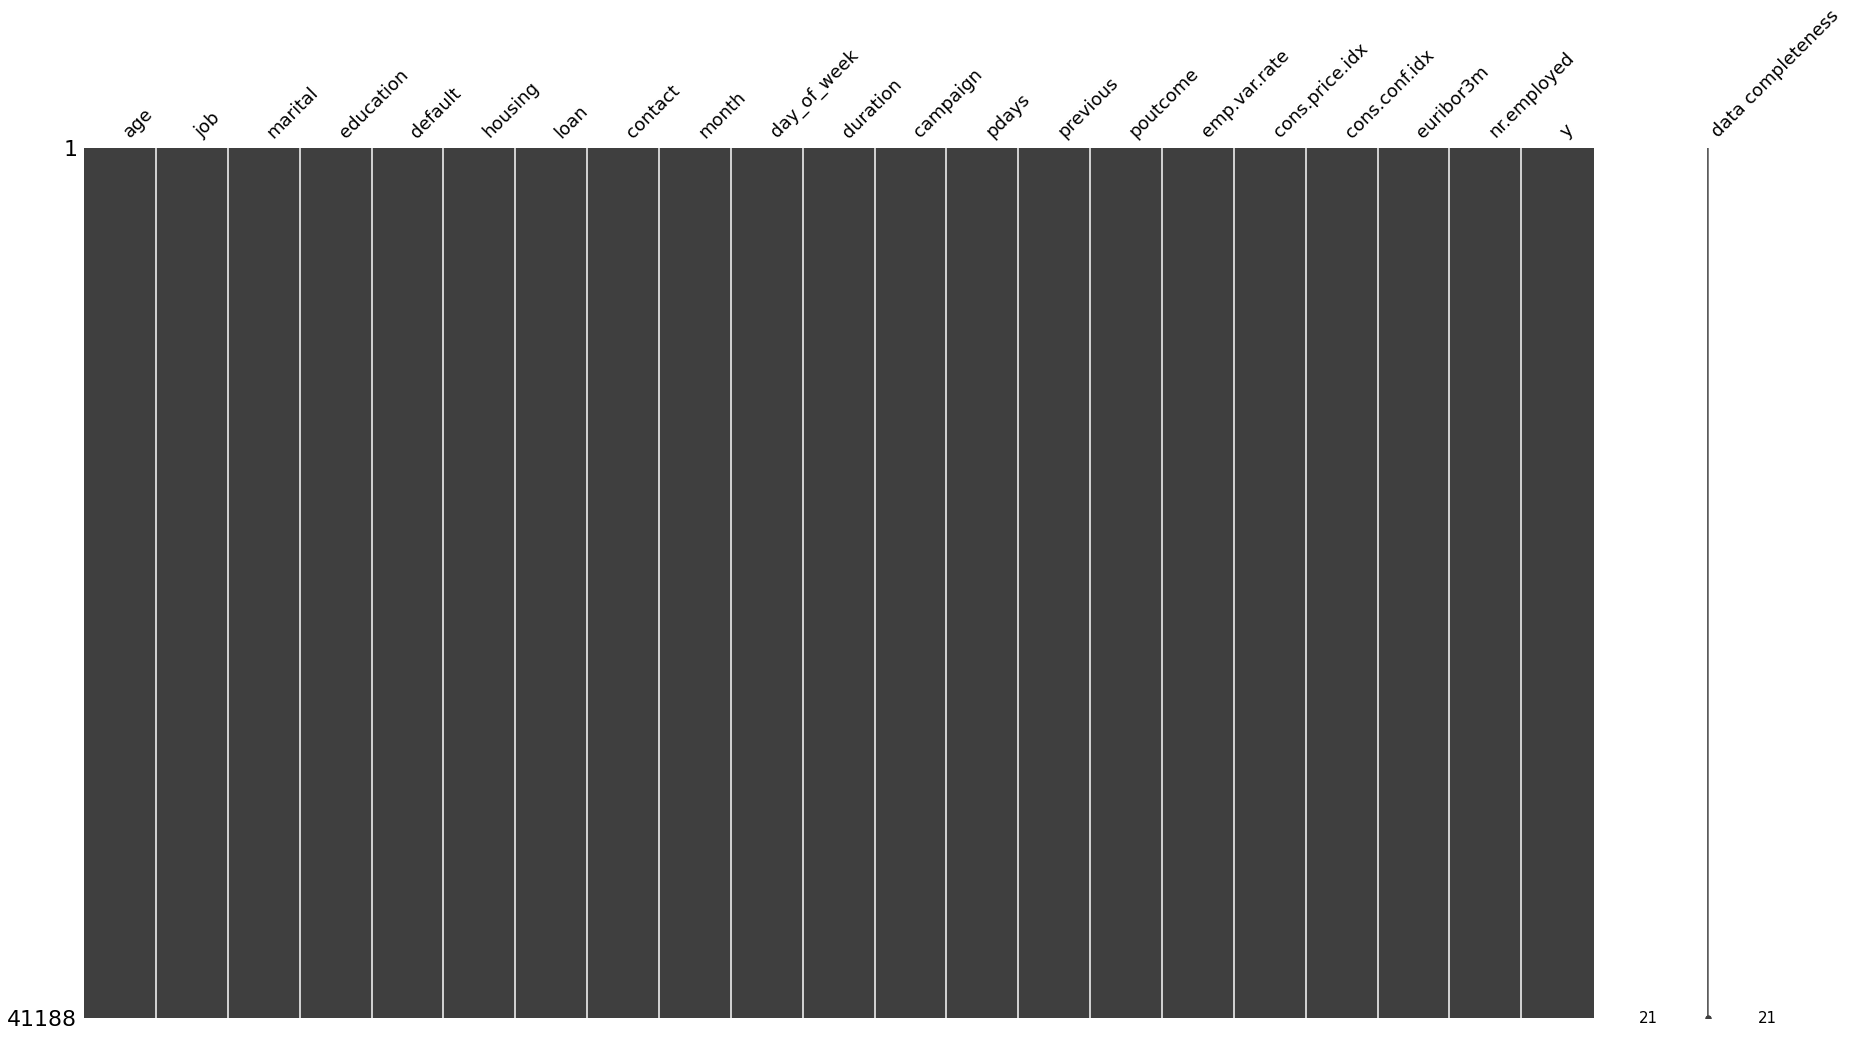

In [10]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=18)

## EDA

In [11]:
# target variable y
df.y.unique()

array(['no', 'yes'], dtype=object)

In [12]:
df.y=df['y'].map({'yes':1,'no':0})

<AxesSubplot:xlabel='y', ylabel='count'>

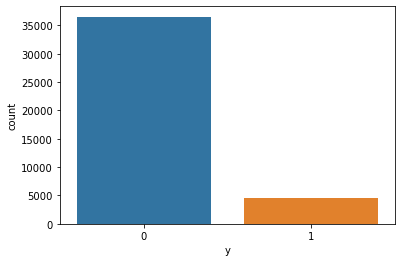

In [13]:
sns.countplot(df.y)

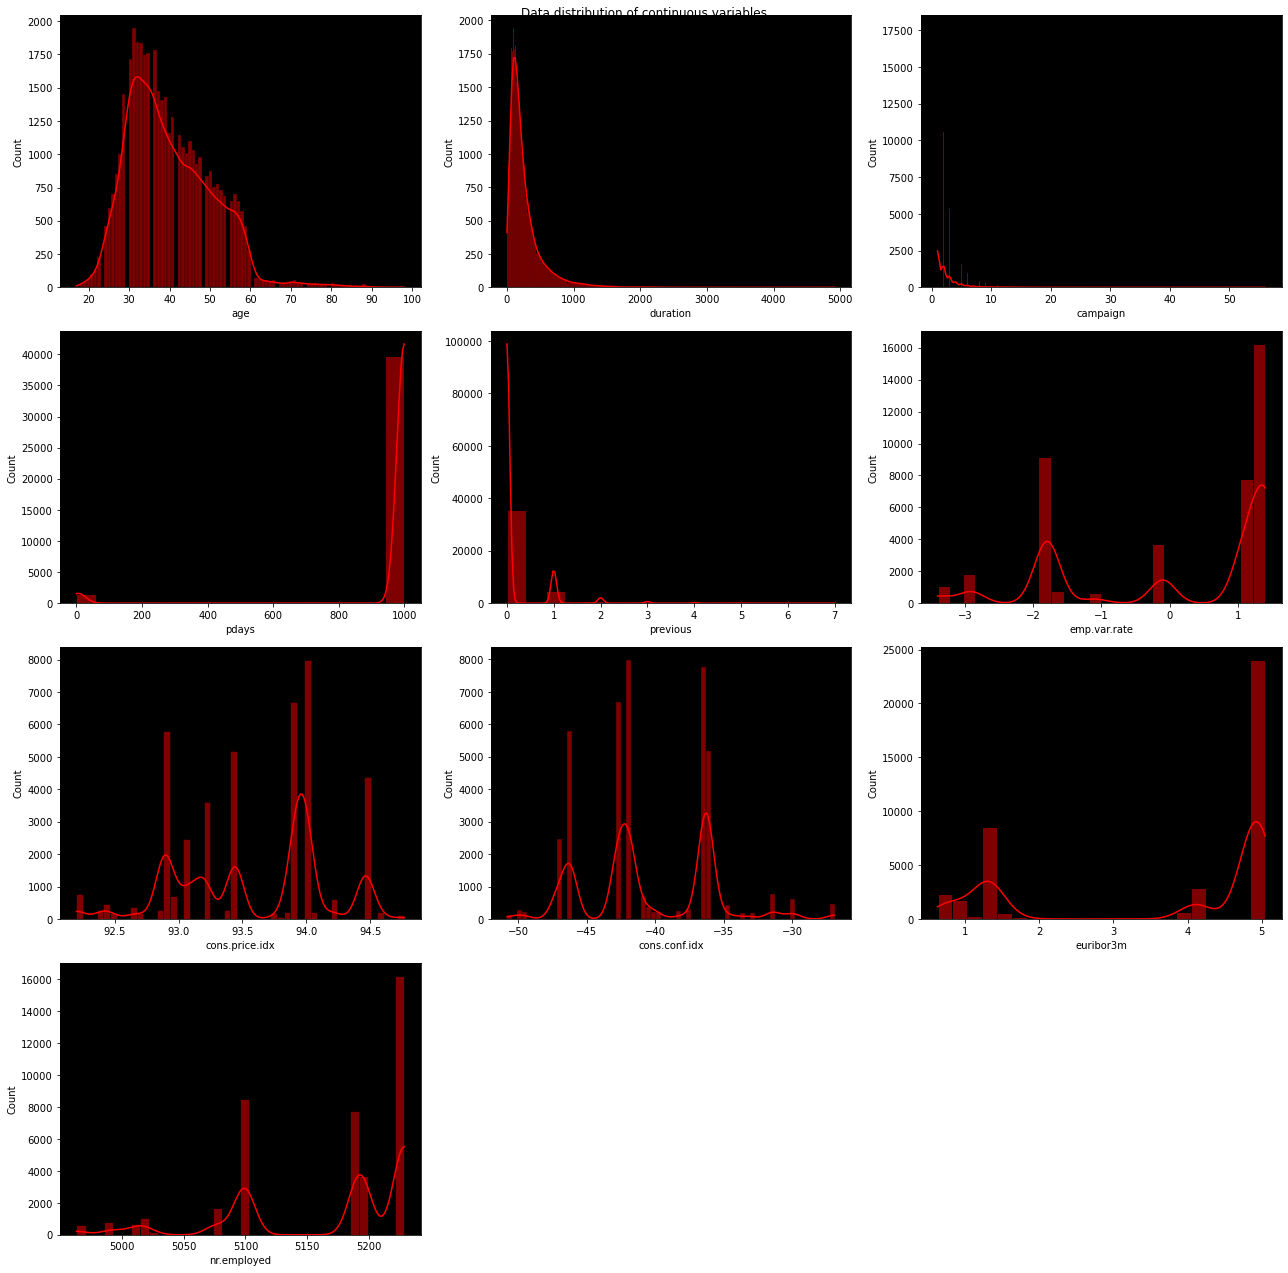

In [14]:



 # histplot for the continuous variables 

plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()


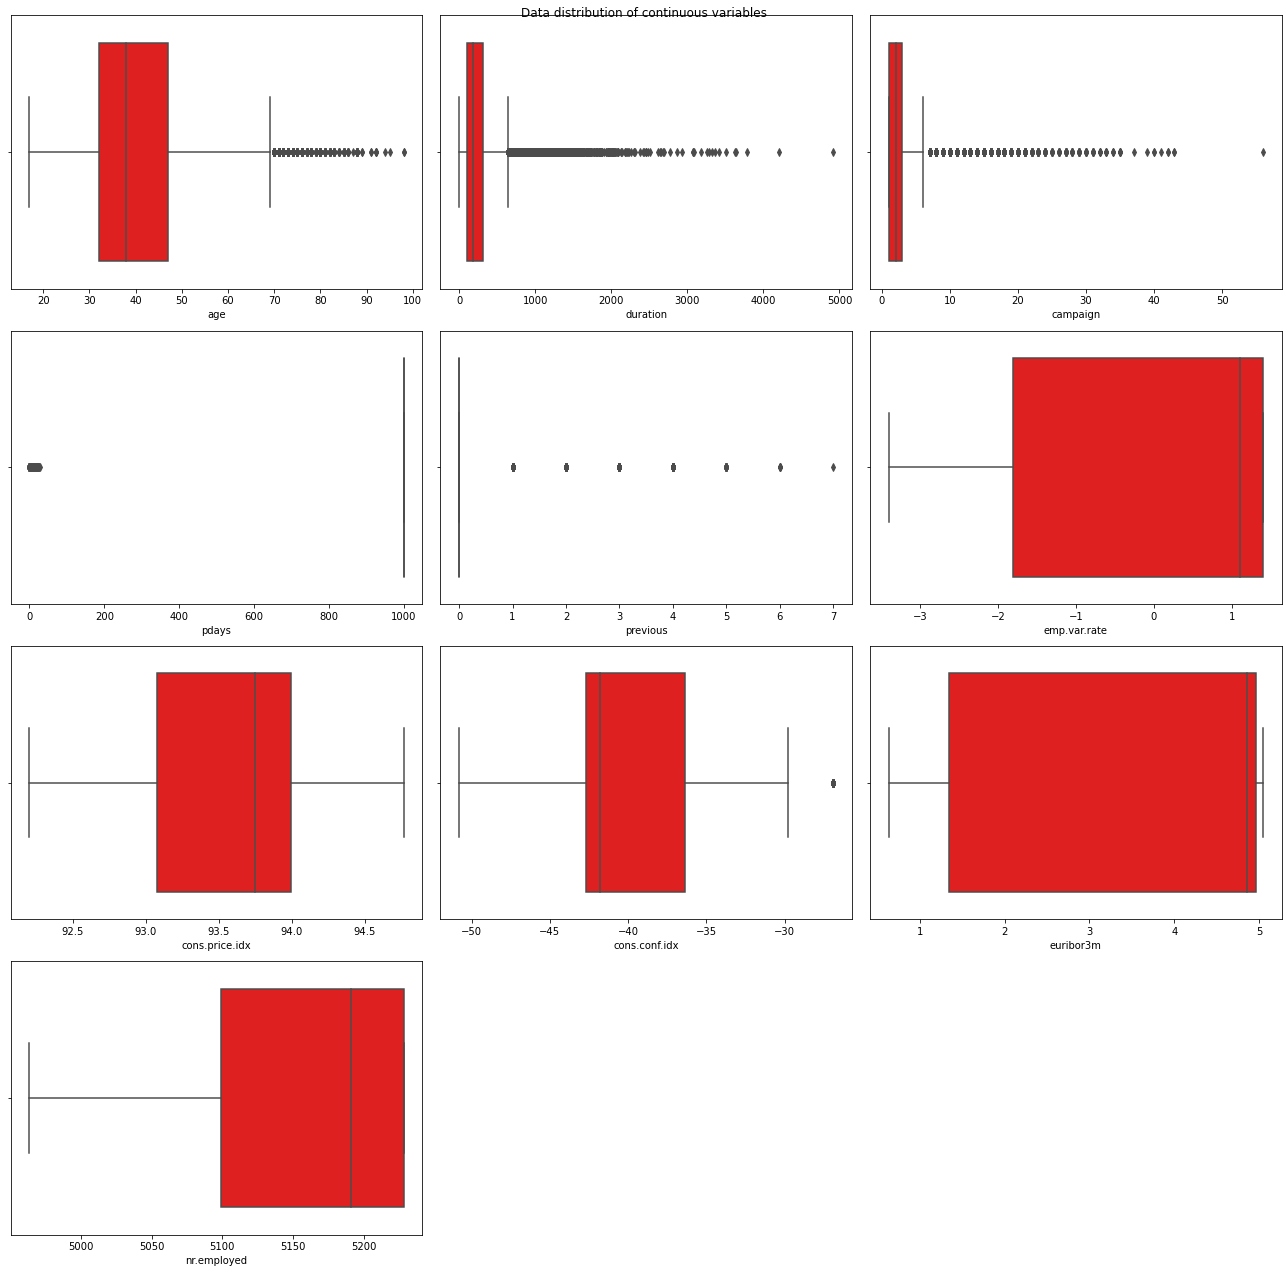

In [15]:
# bar plot for the continuous variables

plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='red')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

<AxesSubplot:>

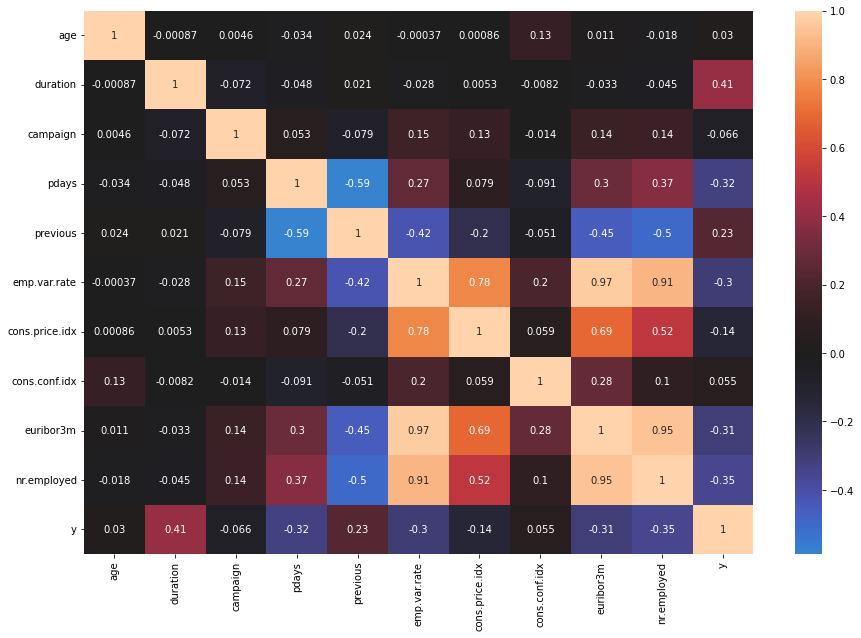

In [16]:
#correlation analysis
#ploting a heatmap to reduce the variable which has less correlation

corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,center=0)


In [17]:
#handling contact
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact', ylabel='count'>

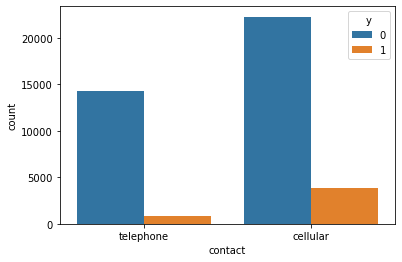

In [18]:
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='contact',data=df,hue='y')

In [19]:
from scipy.stats import chi2_contingency

In [20]:
cs=pd.crosstab(index=df.contact,columns=df.y)
chi2_stat,p_value,dof,expected=chi2_contingency(cs)
print('chi2_stats:',chi2_stat)
print('p-value:',p_value.round(decimals=5))

chi2_stats: 862.3183642075705
p-value: 0.0


In [21]:
#handling default
df.default.value_counts()


no         32588
unknown     8597
yes            3
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

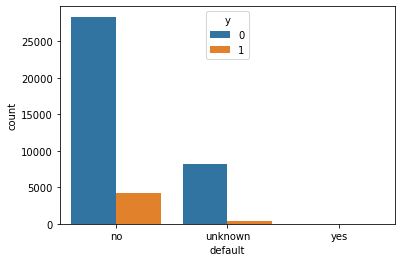

In [22]:
sns.countplot(df.default,hue=df.y)

In [23]:
cs=pd.crosstab(index=df.default,columns=df.y)
chi2_stat,p_value,dof,expected=chi2_contingency(cs)
print('chi2_stats:',chi2_stat)
print('p-value:',p_value.round(decimals=5))

chi2_stats: 406.5775146420093
p-value: 0.0


In [24]:
#handling housing
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

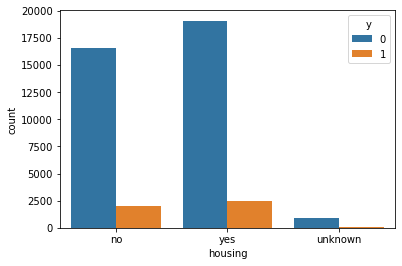

In [25]:
sns.countplot(df.housing,hue=df.y)

In [26]:
cs=pd.crosstab(index=df.housing,columns=df.y)
chi2_stat,p_value,dof,expected=chi2_contingency(cs)
print('chi2_stats:',chi2_stat)
print('p-value:',p_value.round(decimals=5))

chi2_stats: 5.684495858974168
p-value: 0.05829


In [27]:
#handling loan
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

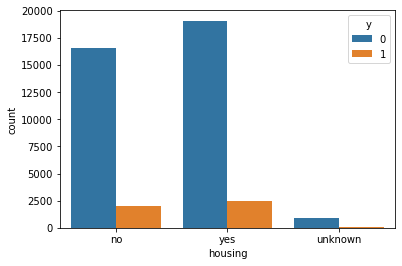

In [28]:
sns.countplot(df.housing,hue=df.y)

In [29]:
cs=pd.crosstab(index=df.loan,columns=df.y)
chi2_stat,p_value,dof,expected=chi2_contingency(cs)
print('chi2_stats:',chi2_stat)
print('p-value:',p_value.round(decimals=5))

chi2_stats: 1.094027551150338
p-value: 0.57868


In [30]:
# handling education
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

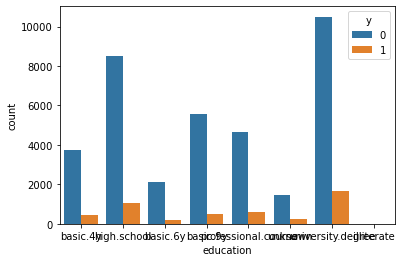

In [31]:
sns.countplot(df.education,hue=df.y)

In [32]:
cs=pd.crosstab(index=df.education,columns=df.y)
chi2_stat,p_value,dof,expected=chi2_contingency(cs)
print('chi2_stats:',chi2_stat)
print('p-value:',p_value.round(decimals=5))

chi2_stats: 193.10590454149565
p-value: 0.0


In [33]:
# handling martial
df.marital.value_counts()



married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

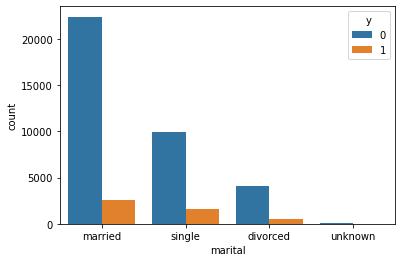

In [34]:
sns.countplot(df.marital,hue=df.y)

In [35]:
cs=pd.crosstab(index=df.marital,columns=df.y)
chi2_stat,p_value,dof,expected=chi2_contingency(cs)
print('chi2_stats:',chi2_stat)
print('p-value:',p_value.round(decimals=5))

chi2_stats: 122.65515182252989
p-value: 0.0


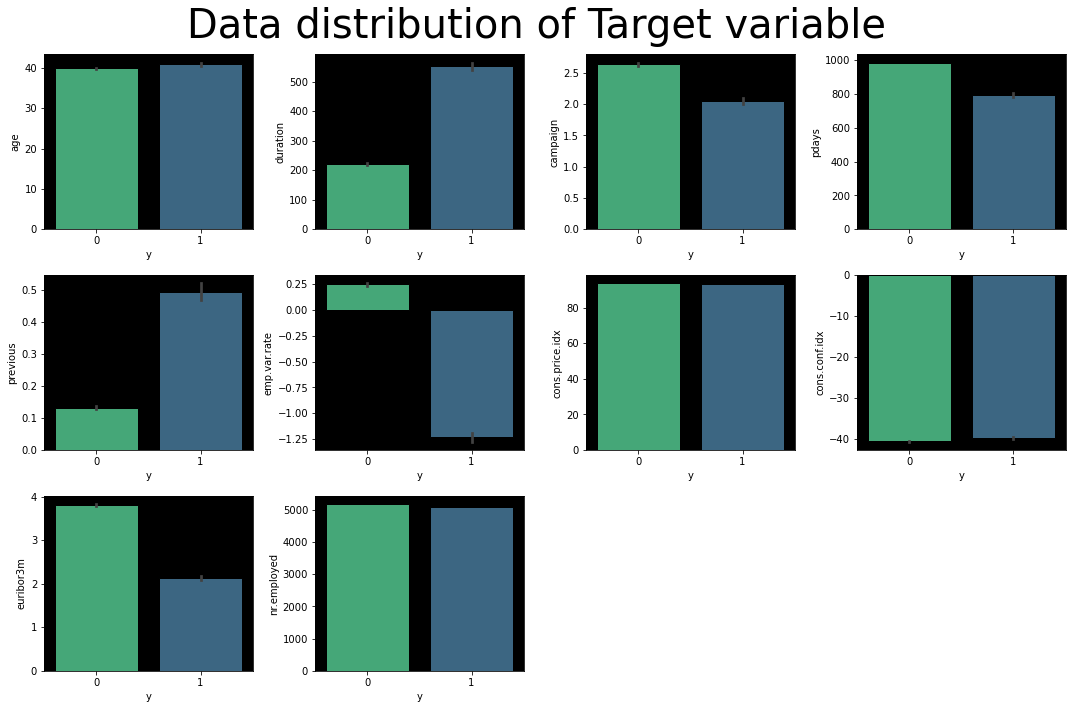

In [36]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data=df,x='y', y=col, ax=ax,edgecolor="black",palette='viridis_r')
font= {'fontsize':25,'color': 'grey'}
plt.suptitle('Data distribution of Target variable',fontsize=40)
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

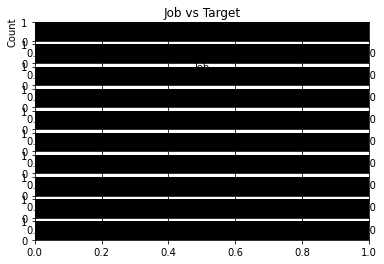

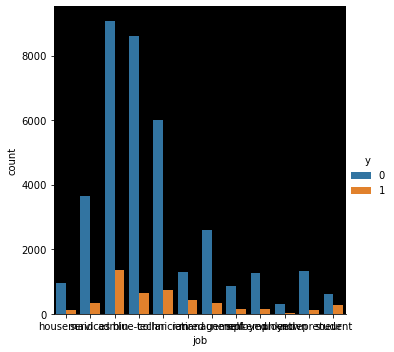

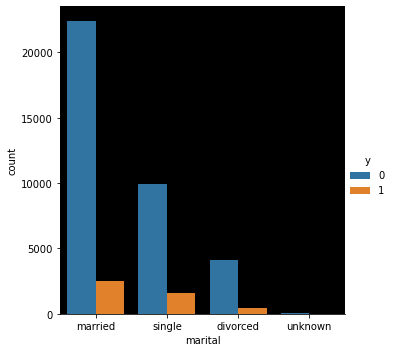

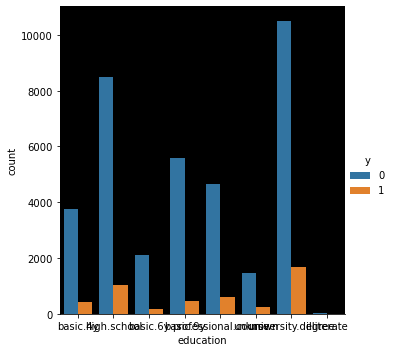

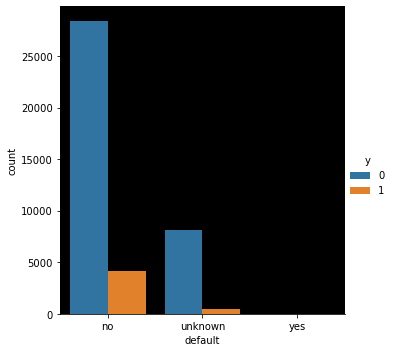

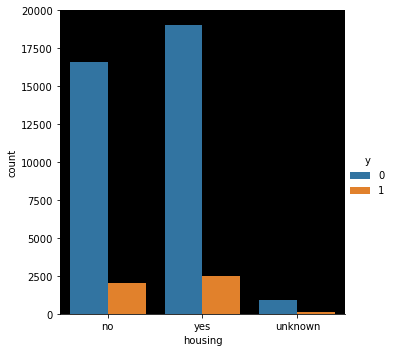

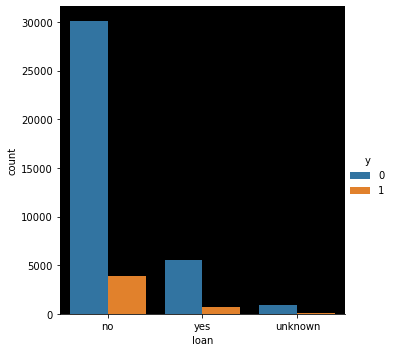

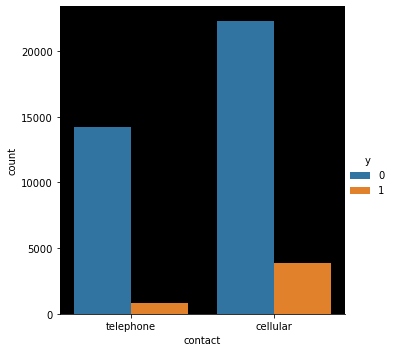

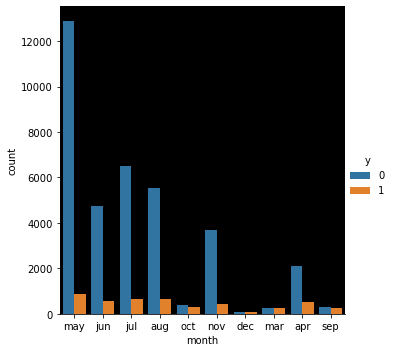

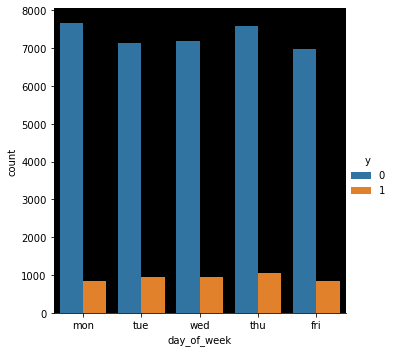

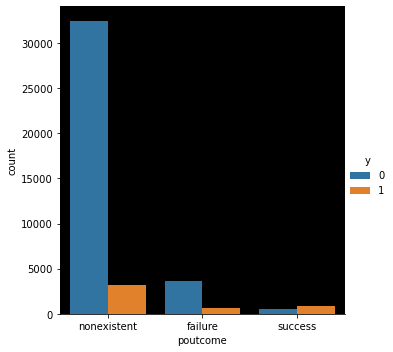

In [37]:
plt.figure(figsize=(15, 10))
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
fig,axes=plt.subplots(nrows=len(cat_cols),ncols=1)

for i,col  in enumerate(cat_cols):
    sns.catplot(x=col, kind='count',hue='y',data=df,ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} vs Target")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    fig.tight_layout
    plt.show()

## handling unbalanced data

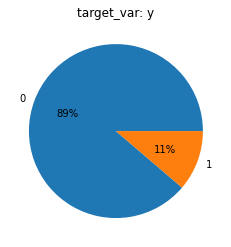

In [38]:
target_var=pd.crosstab(index=df['y'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('target_var: y')
plt.show()

In [39]:
pd.set_option('display.max_columns',None)

In [40]:
#applying One-Hot Encoding
df1=pd.get_dummies(df,drop_first=True)
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [41]:
df1.shape

(41188, 54)

## vif 

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
#splitting data
X=df1.drop('y',axis=1)
y=df1['y']

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [45]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: y
Non-Null Count  Dtype
--------------  -----
41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


In [46]:
vif=pd.DataFrame()
vif['features']=X.columns
vif['vif Factor']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

print(vif.round(decimals=5))

                         features   vif Factor
0                             age     26.59757
1                        duration      2.02592
2                        campaign      1.94918
3                           pdays    342.09852
4                        previous      6.66829
5                    emp.var.rate     93.83749
6                  cons.price.idx  64432.80701
7                   cons.conf.idx    390.56657
8                       euribor3m    788.40154
9                     nr.employed  81582.31552
10                job_blue-collar      3.11964
11               job_entrepreneur      1.18052
12                  job_housemaid      1.21673
13                 job_management      1.34338
14                    job_retired      1.55566
15              job_self-employed      1.16131
16                   job_services      1.58014
17                    job_student      1.22248
18                 job_technician      2.10701
19                 job_unemployed      1.12852
20           

In [47]:
df1.drop(['age','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed',
         'poutcome_nonexistent'],axis=1,inplace=True)

In [48]:
df1.columns

Index(['duration', 'campaign', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success'],
      dtype='object')

In [49]:
df1.shape

(41188, 46)

## Feature selection

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [51]:
X_new


array([[ 56., 261.,   1., ...,   0.,   0.,   0.],
       [ 57., 149.,   1., ...,   0.,   0.,   0.],
       [ 37., 226.,   1., ...,   1.,   0.,   0.],
       ...,
       [ 56., 189.,   2., ...,   1.,   0.,   0.],
       [ 44., 442.,   1., ...,   0.,   0.,   0.],
       [ 74., 239.,   3., ...,   1.,   0.,   0.]])

## train test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=40)

## smote

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
sm=SMOTE(sampling_strategy='auto',random_state=40)

In [56]:
X_train,y_train=sm.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='y', ylabel='count'>

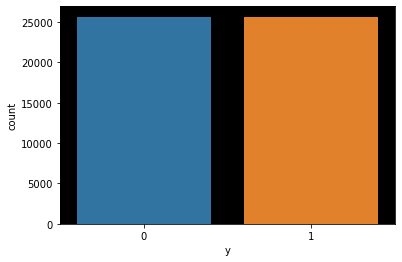

In [57]:
#count plot after resampling
sns.countplot(y_train)

## feature scaling

In [58]:
#standard scaling
from sklearn.preprocessing import StandardScaler

In [59]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling

In [60]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [61]:
## create a new directory to store all the accuracy of the models

model_comparison={}

## Logistic Regression

In [62]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred_1=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred_1,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_1,y_test,average='weighted')*100:.2f}%")

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(classification_report(y_pred_1,y_test,zero_division=1))
model_comparison['Logistic Regression']=[accuracy_score(y_pred_1,y_test),f1_score(y_pred_1,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]


Model Accuracy : 85.00%
Model F1-Score : 83.06%
Cross Val Accuracy: 85.82 %
Cross Val Standard Deviation: 0.32 %
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9487
           1       0.85      0.43      0.57      2870

    accuracy                           0.85     12357
   macro avg       0.85      0.70      0.74     12357
weighted avg       0.85      0.85      0.83     12357



## Decision Tree

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [64]:
# set parameters
param_dist={'max_depth':randint(1,11),
          'criterion':['gini','entropy'],
           'splitter':['best','random']
          }

In [65]:
dt=DecisionTreeClassifier()
random_search = RandomizedSearchCV(dt, param_distributions=param_dist,n_iter=10, cv=5, random_state=0)

#fiting using ramdom_search
random_search.fit(X_train,y_train)

# Make predictions using the best model
best_model = random_search.best_estimator_
y_pred_2=best_model.predict(X_test)
#printing accuracy and f1 score
print(f"Model Accuracy : {accuracy_score(y_pred_2,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_2,y_test,average='weighted')*100:.2f}%")

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred_2,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred_2,y_test),f1_score(y_pred_2,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 88.63%
Model F1-Score : 87.68%
Cross Val Accuracy: 85.82 %
Cross Val Standard Deviation: 0.32 %
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     10162
           1       0.77      0.51      0.61      2195

    accuracy                           0.89     12357
   macro avg       0.84      0.74      0.77     12357
weighted avg       0.88      0.89      0.88     12357



## Random Forest

In [66]:
# Use RandomizedSearchCV to find the best number of estimators
rf=RandomForestClassifier(random_state=0)
param_distributions = {'n_estimators': randint(1,10)}
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000295912C8B50>})

In [67]:
# Get the best number of estimators
best_n_estimators = random_search.best_params_['n_estimators']

# Train the random forest model with the best number of estimators
rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=0)
rf.fit(X_train,y_train)
y_pred_3=rf.predict(X_test)


In [68]:
print(f"Model Accuracy : {accuracy_score(y_pred_3,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_3,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred_3,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred_3,y_test),f1_score(y_pred_3,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]


Model Accuracy : 89.89%
Model F1-Score : 89.88%
Cross Val Accuracy: 85.39 %
Cross Val Standard Deviation: 0.20 %
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10892
           1       0.57      0.57      0.57      1465

    accuracy                           0.90     12357
   macro avg       0.76      0.76      0.76     12357
weighted avg       0.90      0.90      0.90     12357



## KNN

In [69]:
# define the hyperparameter search space
param_dist = {'n_neighbors': randint(1, 11)}
KNN=KNeighborsClassifier()

In [70]:
# create a random search object
random_search = RandomizedSearchCV(KNN, param_distributions=param_dist,cv=5, n_iter=10, random_state=0)
# Fit the random search to the training data
random_search.fit(X_train,y_train)
# Make predictions using the best model
best_model = random_search.best_estimator_
y_pred_4=best_model.predict(X_test)

In [71]:
print(f"Model Accuracy : {accuracy_score(y_pred_4,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_4,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred_4,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred_4,y_test),f1_score(y_pred_4,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 87.64%
Model F1-Score : 87.35%
Cross Val Accuracy: 85.39 %
Cross Val Standard Deviation: 0.20 %
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10736
           1       0.53      0.48      0.50      1621

    accuracy                           0.88     12357
   macro avg       0.73      0.71      0.72     12357
weighted avg       0.87      0.88      0.87     12357



## Naive Bayes

In [72]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred_5=classifier.predict(X_test)

In [73]:
print(f"Model Accuracy : {accuracy_score(y_pred_5,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_5,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred_5,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred_5,y_test),f1_score(y_pred_5,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 87.29%
Model F1-Score : 86.35%
Cross Val Accuracy: 79.64 %
Cross Val Standard Deviation: 0.31 %
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     10275
           1       0.68      0.47      0.56      2082

    accuracy                           0.87     12357
   macro avg       0.79      0.71      0.74     12357
weighted avg       0.86      0.87      0.86     12357



## XGBoost

In [74]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred_6=classifier.predict(X_test)

In [75]:
print(f"Model Accuracy : {accuracy_score(y_pred_6,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred_6,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred_6,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred_6,y_test),f1_score(y_pred_6,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 91.09%
Model F1-Score : 91.30%
Cross Val Accuracy: 92.10 %
Cross Val Standard Deviation: 9.73 %
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11054
           1       0.57      0.64      0.60      1303

    accuracy                           0.91     12357
   macro avg       0.76      0.79      0.78     12357
weighted avg       0.92      0.91      0.91     12357



## ROC curve

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

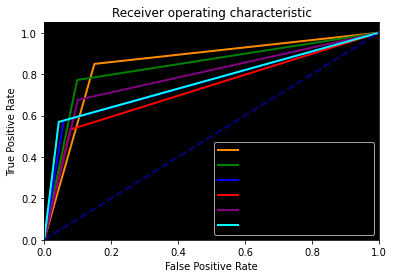

In [77]:
# Compute ROC curve and ROC area for each classifier
fpr1, tpr1, _ = roc_curve(y_test, y_pred_1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred_2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_pred_3)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test, y_pred_4)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_test, y_pred_5)
roc_auc5 = auc(fpr5, tpr5)

fpr6, tpr6, _ = roc_curve(y_test, y_pred_6)
roc_auc6 = auc(fpr6, tpr6)

# Plot ROC curves for all classifiers
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Classifier 1 (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Classifier 2 (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=2, label='Classifier 3 (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='red', lw=2, label='Classifier 4 (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='purple', lw=2, label='Classifier 5 (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='cyan', lw=2, label='Classifier 6 (AUC = %0.2f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

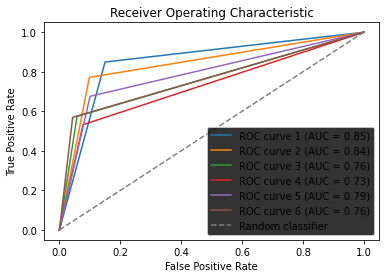

In [78]:
import matplotlib.pyplot as plt
from sklearn import metrics

# create a figure and axis object
fig, ax = plt.subplots()

# plot the ROC curves for y_pred_1 to y_pred_6
for i, y_pred in enumerate([y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6]):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'ROC curve {i+1} (AUC = {roc_auc:.2f})')

# plot the diagonal line
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random classifier')

# set the title and axis labels
ax.set_title('Receiver Operating Characteristic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# set the background color of the plot
ax.set_facecolor('white')

# add a legend to the plot
ax.legend(loc='lower right')

# display the plot
plt.show()



## Models comparison

In [79]:
model_com_df=pd.DataFrame(model_comparison).T
model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV Standard Deviation']
model_com_df=model_com_df.sort_values(by='Model F1-Score',ascending=False)
model_com_df.style.format('{:.2%}').background_gradient(cmap='Greens')


,Model Accuracy,Model F1-Score,CV Accuracy,CV Standard Deviation
Xg Boost,91.09%,91.30%,92.10%,9.73%
Random Forest,89.89%,89.88%,85.39%,0.20%
Decision Tree,88.63%,87.68%,85.82%,0.32%
KNN,87.64%,87.35%,85.39%,0.20%
Naive Bayes,87.29%,86.35%,79.64%,0.31%
Logistic Regression,85.00%,83.06%,85.82%,0.32%


In [80]:
## maximum accuracies in each column
model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV Standard Deviation
Xg Boost,91.09%,91.30%,92.10%,9.73%
Random Forest,89.89%,89.88%,85.39%,0.20%
Decision Tree,88.63%,87.68%,85.82%,0.32%
KNN,87.64%,87.35%,85.39%,0.20%
Naive Bayes,87.29%,86.35%,79.64%,0.31%
Logistic Regression,85.00%,83.06%,85.82%,0.32%


In [81]:
# minimum accuracies in each column
model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV Standard Deviation
Xg Boost,91.09%,91.30%,92.10%,9.73%
Random Forest,89.89%,89.88%,85.39%,0.20%
Decision Tree,88.63%,87.68%,85.82%,0.32%
KNN,87.64%,87.35%,85.39%,0.20%
Naive Bayes,87.29%,86.35%,79.64%,0.31%
Logistic Regression,85.00%,83.06%,85.82%,0.32%


## Comparing real and predicted value

In [82]:
# Result
predicted=pd.DataFrame(y_pred_6,columns=['Estimated y'])
predicted.head(5)

,Estimated y
0,0
1,0
2,0
3,0
4,0


In [83]:
original = pd.DataFrame(y_test)
original = original.reset_index(drop=True)
original.head()

,y
0,1
1,0
2,0
3,0
4,0


In [84]:
Result=pd.concat([original,predicted],axis=1)
Result

,y,Estimated y
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12352,0,0
12353,1,1
12354,0,0
12355,0,0


## ploting Result

In [85]:
# generate some example data for y_test and y_pred_6
y_test = pd.Series(np.random.randint(0,2,20))
y_pred_6 = pd.Series(np.random.randint(0,2,20))

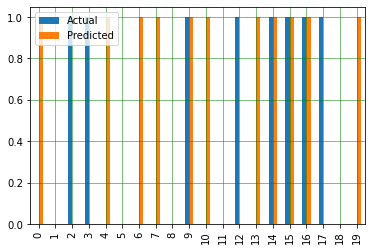

In [91]:
# convert Pandas Series objects to NumPy arrays and flatten them
y_test_arr = y_test.to_numpy().flatten()
y_pred_6_arr = y_pred_6.to_numpy().flatten()

# create a new Pandas DataFrame using the flattened arrays
df1 = pd.DataFrame({'Actual': y_test_arr, 'Predicted': y_pred_6_arr})

# plot the DataFrame as a bar chart
df1.plot(kind='bar')
plt.rcParams['axes.facecolor'] = 'grey'
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()